In [20]:
import numpy as np
import random as rm
import datetime

# Os estados do sistema atual
states = ["Coleta Realizada Localmente", "Armazena Localmente", "Perda de Dados",
          "Transfere para Nuvem", "Associa ao Local Corretamente", "Associa ao Local Incorretamente"]

# Possíveis sequências de eventos (nomes das transições)
transitionName = [
    ["CRL_CRL", "CRL_AL", "CRL_PD", "CRL_TN", "CRL_ALC", "CRL_ALI"],
    ["AL_CRL", "AL_AL", "AL_PD", "AL_TN", "AL_ALC", "AL_ALI"],
    ["PD_CRL", "PD_AL", "PD_PD", "PD_TN", "PD_ALC", "PD_ALI"],
    ["TN_CRL", "TN_AL", "TN_PD", "TN_TN", "TN_ALC", "TN_ALI"],
    ["ALC_CRL", "ALC_AL", "ALC_PD", "ALC_TN", "ALC_ALC", "ALC_ALI"],
    ["ALI_CRL", "ALI_AL", "ALI_PD", "ALI_TN", "ALI_ALC", "ALI_ALI"]
]

# Matriz de probabilidades de transição (transitionMatrix)
transitionMatrix = [
    [0, 0.98, 0.02, 0, 0, 0],     # Coleta Realizada Localmente
    [0, 0, 0.06, 0.94, 0, 0],     # Armazena Localmente
    [1.0, 0, 0, 0, 0, 0],         # Perda de Dados
    [0, 0, 0, 0, 0.9, 0.1],       # Transfere para Nuvem
    [0, 0, 0, 0, 0.98, 0.02],     # Associa ao Local Corretamente
    [0, 0, 0, 0, 0.2, 0.8]        # Associa ao Local Incorretamente
]

if (sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2])) != 3:
    print("Detectado um erro - talvez na matriz de probabilidades?")
else: print("Tudo certo. Vamos em frente. ", (datetime.datetime.now()+datetime.timedelta(hours=-3)), "!!")


Tudo certo. Vamos em frente.  2024-11-07 16:45:43.107102 !!



G2: Simulação com Markov para Sistema Atual - Sem controle automatizado de Rastreabilidade  [2024-11-07 16:45:43.722993]
     >> Simulação quantidade de dias = 100
     >> Número de acessos por dia = 210


1. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar no mesmo estado é de ......................: 0.00 %
2. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar em "Armazena Localmente" é de ...............: 0.00 %
3. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar em "Perda de Dados" é de ...................: 5.41 %
4. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar em "Transfere para Nuvem" é de .............: 0.00 %
5. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar em "Associa ao Local Corretamente" é de ....: 85.78 %
6. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar em "Associa ao Local Incorretamente" é de

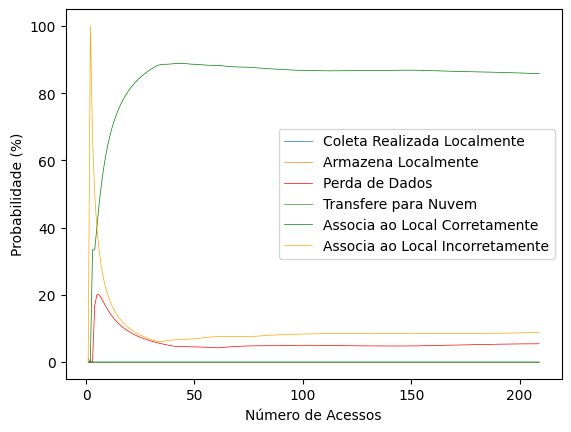

In [ ]:
import numpy as np
import random as rm
import datetime
import matplotlib.pyplot as plt

from types import EllipsisType

def activity_forecast(actions):
    # Começando no estado inicial
    activityAction = "Coleta Realizada Localmente"
    activityList = [activityAction]
    i = 0
    prob = 1

    estados_finais = ["Associa ao Local Corretamente", "Associa ao Local Incorretamente", "Perda de Dados"]
    while i < actions:
        # Verifica se o estado atual é um dos estados finais, para interromper o loop
        if activityAction in estados_finais:
            break

        # Estado - Coleta Realizada Localmente
        if activityAction == "Coleta Realizada Localmente":
            change = np.random.choice(transitionName[0], replace=True, p=transitionMatrix[0])
            if change == "CRL_AL":
                prob *= 0.98
                activityAction = "Armazena Localmente"
            elif change == "CRL_PD":
                prob *= 0.02
                activityAction = "Perda de Dados"
            elif change == "CRL_TN":
                prob *= 0
                activityAction = "Transfere para Nuvem"
            elif change == "CRL_ALC":
                prob *= 0
                activityAction = "Associa ao Local Corretamente"
            elif change == "CRL_ALI":
                prob *= 0
                activityAction = "Associa ao Local Incorretamente"

        # Estado - Armazena Localmente
        elif activityAction == "Armazena Localmente":
            change = np.random.choice(transitionName[1], replace=True, p=transitionMatrix[1])
            if change == "AL_PD":
                prob *= 0.06
                activityAction = "Perda de Dados"
            elif change == "AL_TN":
                prob *= 0.94
                activityAction = "Transfere para Nuvem"
            elif change == "AL_CRL":
                prob *= 0
                activityAction = "Coleta Realizada Localmente"
            elif change == "AL_ALC":
                prob *= 0
                activityAction = "Associa ao Local Corretamente"
            elif change == "AL_ALI":
                prob *= 0
                activityAction = "Associa ao Local Incorretamente"

        # Estado - Perda de Dados
        elif activityAction == "Perda de Dados":
            change = np.random.choice(transitionName[2], replace=True, p=transitionMatrix[2])
            if change == "PD_CRL":
                prob *= 1.0
                activityAction = "Coleta Realizada Localmente"

        # Estado - Transfere para Nuvem
        elif activityAction == "Transfere para Nuvem":
            change = np.random.choice(transitionName[3], replace=True, p=transitionMatrix[3])
            if change == "TN_ALC":
                prob *= 0.9
                activityAction = "Associa ao Local Corretamente"
            elif change == "TN_ALI":
                prob *= 0.1
                activityAction = "Associa ao Local Incorretamente"

        # Estado - Associa ao Local Corretamente
        elif activityAction == "Associa ao Local Corretamente":
            change = np.random.choice(transitionName[4], replace=True, p=transitionMatrix[4])
            if change == "ALC_ALC":
                prob *= 0.98
                activityAction = "Associa ao Local Corretamente"
            elif change == "ALC_ALI":
                prob *= 0.02
                activityAction = "Associa ao Local Incorretamente"

        # Estado - Associa ao Local Incorretamente
        elif activityAction == "Associa ao Local Incorretamente":
            change = np.random.choice(transitionName[5], replace=True, p=transitionMatrix[5])
            if change == "ALI_ALC":
                prob *= 0.2
                activityAction = "Associa ao Local Corretamente"
            elif change == "ALI_ALI":
                prob *= 0.8
                activityAction = "Associa ao Local Incorretamente"

        # Adiciona o novo estado à lista de atividades
        activityList.append(activityAction)
        i += 1

    return activityList, prob

# Para salvar cada activityList
list_activity = []
countCRL = 0  # Coleta Realizada Localmente
countAL = 0   # Armazena Localmente
countPD = 0   # Perda de Dados
countTN = 0   # Transfere para Nuvem
countALC = 0  # Associa ao Local Corretamente
countALI = 0  # Associa ao Local Incorretamente

# Vetores de probabilidades e eixo X
eixoX = []
probCRL = []  # Probabilidade de Coleta Realizada Localmente
probAL = []   # Probabilidade de Armazena Localmente
probPD = []   # Probabilidade de Perda de Dados
probTN = []   # Probabilidade de Transfere para Nuvem
probALC = []  # Probabilidade de Associa ao Local Corretamente
probALI = []  # Probabilidade de Associa ao Local Incorretamente

# Inicializando as probabilidades com o estado inicial
probCRL.append(1.0)
probAL.append(0.0)
probPD.append(0.0)
probTN.append(0.0)
probALC.append(0.0)
probALI.append(0.0)

# Definindo o número de ações e dias para a simulação
Nactions = 210  # Número de acessos simulados
Ndias = 100     # Estimativa em dias (previsão)

# Para o cálculo de probabilidade em cada predição (acumulado)
totalSimuladoPredicao = 0

iteracao = 1

# Definindo o eixo X para o gráfico
for index in range(1, Nactions):
    eixoX.append(index)

print("====================================================================")
print()
print(f"G2: Simulação com Markov para Sistema Atual"
print(f"     >> Simulação quantidade de dias = {Ndias}")
print(f"     >> Número de acessos por dia = {Nactions}")
print()
print("====================================================================")
print()

# Executando a simulação
for iteractions in range(1, Nactions):
    # Realiza a simulação e salva a lista de atividades resultante
    activity_result, _ = activity_forecast(Ndias)  # Estimar Ndias
    list_activity.append(activity_result)

    # Contagem dos estados finais de cada trajetória
    for smaller_list in list_activity:
        # Contando ocorrências do estado final em cada trajetória
        if smaller_list[-1] == "Coleta Realizada Localmente":
            countCRL += 1
        elif smaller_list[-1] == "Armazena Localmente":
            countAL += 1
        elif smaller_list[-1] == "Perda de Dados":
            countPD += 1
        elif smaller_list[-1] == "Transfere para Nuvem":
            countTN += 1
        elif smaller_list[-1] == "Associa ao Local Corretamente":
            countALC += 1
        elif smaller_list[-1] == "Associa ao Local Incorretamente":
            countALI += 1

    # Calcula o total simulado para a previsão
    totalSimuladoPredicao = countCRL + countAL + countPD + countTN + countALC + countALI

    # Calcula e armazena as probabilidades para cada estado final
    probCRL.append((countCRL / totalSimuladoPredicao) * 100.0)
    probAL.append((countAL / totalSimuladoPredicao) * 100.0)
    probPD.append((countPD / totalSimuladoPredicao) * 100.0)
    probTN.append((countTN / totalSimuladoPredicao) * 100.0)
    probALC.append((countALC / totalSimuladoPredicao) * 100.0)
    probALI.append((countALI / totalSimuladoPredicao) * 100.0)

    iteracao += 1

# Exibindo os resultados finais de probabilidade
print(f'1. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar no mesmo estado é de ......................: {probCRL[-1]:.2f} %')
print(f'2. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar em "Armazena Localmente" é de ...............: {probAL[-1]:.2f} %')
print(f'3. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar em "Perda de Dados" é de ...................: {probPD[-1]:.2f} %')
print(f'4. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar em "Transfere para Nuvem" é de .............: {probTN[-1]:.2f} %')
print(f'5. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar em "Associa ao Local Corretamente" é de ....: {probALC[-1]:.2f} %')
print(f'6. A probabilidade de iniciar no estado "Coleta Realizada Localmente" e terminar em "Associa ao Local Incorretamente" é de ...: {probALI[-1]:.2f} %')
print()
print()

# Gerando o gráfico das probabilidades
plt.plot(eixoX[:Nactions-1], probCRL[:Nactions-1], label='Coleta Realizada Localmente', linewidth=0.5)
plt.plot(eixoX[:Nactions-1], probAL[:Nactions-1], label='Armazena Localmente', linewidth=0.5)
plt.plot(eixoX[:Nactions-1], probPD[:Nactions-1], label='Perda de Dados', linewidth=0.5, color='red')
plt.plot(eixoX[:Nactions-1], probTN[:Nactions-1], label='Transfere para Nuvem', linewidth=0.5)
plt.plot(eixoX[:Nactions-1], probALC[:Nactions-1], label='Associa ao Local Corretamente', linewidth=0.5, color='green')
plt.plot(eixoX[:Nactions-1], probALI[:Nactions-1], label='Associa ao Local Incorretamente', linewidth=0.5, color='orange')
plt.xlabel("Número de Acessos")
plt.ylabel("Probabilidade (%)")
plt.legend()
plt.show()

In [22]:
# Definindo os estados do sistema novo
states = ["Coleta Realizada Direto na Plataforma", "Geração de Hash", "Perda de Dados",
          "Associa ao Local Corretamente", "Associa ao Local Incorretamente"]

# Possíveis sequências de eventos (nomes das transições)
transitionName = [
    ["CRP_CRP", "CRP_GH", "CRP_PD", "CRP_ALC", "CRP_ALI"],
    ["GH_CRP", "GH_GH", "GH_PD", "GH_ALC", "GH_ALI"],
    ["PD_CRP", "PD_GH", "PD_PD", "PD_ALC", "PD_ALI"],
    ["ALC_CRP", "ALC_GH", "ALC_PD", "ALC_ALC", "ALC_ALI"],
    ["ALI_CRP", "ALI_GH", "ALI_PD", "ALI_ALC", "ALI_ALI"]
]

# Matriz de probabilidades de transição (transitionMatrix)
transitionMatrix = [
    [0, 0.98, 0.02, 0, 0],     # Coleta Realizada Direto na Plataforma
    [0, 0, 0, 0.98, 0.02],     # Geração de Hash
    [1.0, 0, 0, 0, 0],         # Perda de Dados
    [0, 0, 0, 0.98, 0.02],     # Associa ao Local Corretamente
    [0, 0, 0, 0.2, 0.8]        # Associa ao Local Incorretamente
]


G2: Simulação com Markov para Sistema Novo - Sem controle automatizado de Rastreabilidade  [2024-11-07 16:45:44.061578]
     >> Simulação quantidade de dias = 100
     >> Número de acessos por dia = 210


1. A probabilidade de iniciar no estado "Coleta Realizada Direto na Plataforma" e terminar no mesmo estado é de ......................: 0.00 %
2. A probabilidade de iniciar no estado "Coleta Realizada Direto na Plataforma" e terminar em "Geração de Hash" é de ...............: 0.00 %
3. A probabilidade de iniciar no estado "Coleta Realizada Direto na Plataforma" e terminar em "Perda de Dados" é de ...................: 1.41 %
4. A probabilidade de iniciar no estado "Coleta Realizada Direto na Plataforma" e terminar em "Associa ao Local Corretamente" é de ....: 96.11 %
5. A probabilidade de iniciar no estado "Coleta Realizada Direto na Plataforma" e terminar em "Associa ao Local Incorretamente" é de ...: 2.48 %




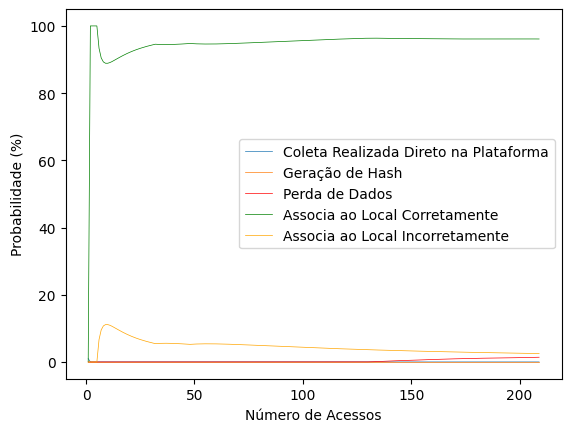

In [ ]:
# Definindo a função `activity_forecast` para o sistema novo
def activity_forecast(actions):
    # Começando no estado inicial
    activityAction = "Coleta Realizada Direto na Plataforma"
    activityList = [activityAction]
    i = 0
    prob = 1

    # Definindo os estados finais
    estados_finais = ["Associa ao Local Corretamente", "Associa ao Local Incorretamente", "Perda de Dados"]

    while i < actions:
        # Verifica se o estado atual é um dos estados finais, para interromper o loop
        if activityAction in estados_finais:
            break

        # Estado - Coleta Realizada Direto na Plataforma
        if activityAction == "Coleta Realizada Direto na Plataforma":
            change = np.random.choice(transitionName[0], replace=True, p=transitionMatrix[0])
            if change == "CRP_GH":
                prob *= 0.98
                activityAction = "Geração de Hash"
            elif change == "CRP_PD":
                prob *= 0.02
                activityAction = "Perda de Dados"

        # Estado - Geração de Hash
        elif activityAction == "Geração de Hash":
            change = np.random.choice(transitionName[1], replace=True, p=transitionMatrix[1])
            if change == "GH_ALC":
                prob *= 0.98
                activityAction = "Associa ao Local Corretamente"
            elif change == "GH_ALI":
                prob *= 0.02
                activityAction = "Associa ao Local Incorretamente"

        # Estado - Perda de Dados
        elif activityAction == "Perda de Dados":
            change = np.random.choice(transitionName[2], replace=True, p=transitionMatrix[2])
            if change == "PD_CRP":
                prob *= 1.0
                activityAction = "Coleta Realizada Direto na Plataforma"

        # Estado - Associa ao Local Corretamente
        elif activityAction == "Associa ao Local Corretamente":
            change = np.random.choice(transitionName[3], replace=True, p=transitionMatrix[3])
            if change == "ALC_ALC":
                prob *= 0.98
                activityAction = "Associa ao Local Corretamente"
            elif change == "ALC_ALI":
                prob *= 0.02
                activityAction = "Associa ao Local Incorretamente"

        # Estado - Associa ao Local Incorretamente
        elif activityAction == "Associa ao Local Incorretamente":
            change = np.random.choice(transitionName[4], replace=True, p=transitionMatrix[4])
            if change == "ALI_ALC":
                prob *= 0.2
                activityAction = "Associa ao Local Corretamente"
            elif change == "ALI_ALI":
                prob *= 0.8
                activityAction = "Associa ao Local Incorretamente"

        # Adiciona o novo estado à lista de atividades
        activityList.append(activityAction)
        i += 1

    return activityList, prob


# Configurações para a simulação e cálculo de probabilidades
list_activity = []
countCRP = 0  # Coleta Realizada Direto na Plataforma
countGH = 0   # Geração de Hash
countPD = 0   # Perda de Dados
countALC = 0  # Associa ao Local Corretamente
countALI = 0  # Associa ao Local Incorretamente

# Vetores de probabilidades e eixo X
eixoX = []
probCRP = []  # Probabilidade de Coleta Realizada Direto na Plataforma
probGH = []   # Probabilidade de Geração de Hash
probPD = []   # Probabilidade de Perda de Dados
probALC = []  # Probabilidade de Associa ao Local Corretamente
probALI = []  # Probabilidade de Associa ao Local Incorretamente

# Inicializando as probabilidades com o estado inicial
probCRP.append(1.0)
probGH.append(0.0)
probPD.append(0.0)
probALC.append(0.0)
probALI.append(0.0)

# Definindo o número de ações e dias para a simulação
Nactions = 210  # Número de acessos simulados
Ndias = 100     # Estimativa em dias (previsão)

# Para o cálculo de probabilidade em cada predição (acumulado)
totalSimuladoPredicao = 0

iteracao = 1

# Definindo o eixo X para o gráfico
for index in range(1, Nactions):
    eixoX.append(index)

print("====================================================================")
print()
print(f"G2: Simulação com Markov para Sistema Novo")
print(f"     >> Simulação quantidade de dias = {Ndias}")
print(f"     >> Número de acessos por dia = {Nactions}")
print()
print("====================================================================")
print()

# Executando a simulação
for iteractions in range(1, Nactions):
    # Realiza a simulação e salva a lista de atividades resultante
    activity_result, _ = activity_forecast(Ndias)
    list_activity.append(activity_result)

    # Contagem dos estados finais de cada trajetória
    for smaller_list in list_activity:
        # Contando ocorrências do estado final em cada trajetória
        if smaller_list[-1] == "Coleta Realizada Direto na Plataforma":
            countCRP += 1
        elif smaller_list[-1] == "Geração de Hash":
            countGH += 1
        elif smaller_list[-1] == "Perda de Dados":
            countPD += 1
        elif smaller_list[-1] == "Associa ao Local Corretamente":
            countALC += 1
        elif smaller_list[-1] == "Associa ao Local Incorretamente":
            countALI += 1

    # Calcula o total simulado para a previsão
    totalSimuladoPredicao = countCRP + countGH + countPD + countALC + countALI

    # Calcula e armazena as probabilidades para cada estado final
    probCRP.append((countCRP / totalSimuladoPredicao) * 100.0)
    probGH.append((countGH / totalSimuladoPredicao) * 100.0)
    probPD.append((countPD / totalSimuladoPredicao) * 100.0)
    probALC.append((countALC / totalSimuladoPredicao) * 100.0)
    probALI.append((countALI / totalSimuladoPredicao) * 100.0)

    iteracao += 1

# Exibindo os resultados finais de probabilidade
print(f'1. A probabilidade de iniciar no estado "Coleta Realizada Direto na Plataforma" e terminar no mesmo estado é de ......................: {probCRP[-1]:.2f} %')
print(f'2. A probabilidade de iniciar no estado "Coleta Realizada Direto na Plataforma" e terminar em "Geração de Hash" é de ...............: {probGH[-1]:.2f} %')
print(f'3. A probabilidade de iniciar no estado "Coleta Realizada Direto na Plataforma" e terminar em "Perda de Dados" é de ...................: {probPD[-1]:.2f} %')
print(f'4. A probabilidade de iniciar no estado "Coleta Realizada Direto na Plataforma" e terminar em "Associa ao Local Corretamente" é de ....: {probALC[-1]:.2f} %')
print(f'5. A probabilidade de iniciar no estado "Coleta Realizada Direto na Plataforma" e terminar em "Associa ao Local Incorretamente" é de ...: {probALI[-1]:.2f} %')
print()
print()

# Gerando o gráfico das probabilidades
plt.plot(eixoX[:Nactions-1], probCRP[:Nactions-1], label='Coleta Realizada Direto na Plataforma', linewidth=0.5)
plt.plot(eixoX[:Nactions-1], probGH[:Nactions-1], label='Geração de Hash', linewidth=0.5)
plt.plot(eixoX[:Nactions-1], probPD[:Nactions-1], label='Perda de Dados', linewidth=0.5, color='red')
plt.plot(eixoX[:Nactions-1], probALC[:Nactions-1], label='Associa ao Local Corretamente', linewidth=0.5, color='green')
plt.plot(eixoX[:Nactions-1], probALI[:Nactions-1], label='Associa ao Local Incorretamente', linewidth=0.5, color='orange')
plt.xlabel("Número de Acessos")
plt.ylabel("Probabilidade (%)")
plt.legend()
plt.show()